In [1]:
import tensorflow as tf
print(tf.__version__)

2.16.2


In [2]:
import tensorflow as tf
print("GPUs:", tf.config.list_physical_devices("GPU"))


GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# notebooks/logistic_baseline.ipynb

import os
import numpy as np
from PIL import Image
from tqdm import tqdm
from tensorflow.keras import regularizers

import tensorflow as tf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
# Set data path (adjust to your structure)
data_dir = "../../../archive/seg_train/seg_train/"  # or the correct relative path

# Parameters
img_size = (64, 64)

# Load and preprocess images
def load_images(data_dir, img_size):
    X = []
    y = []
    class_names = os.listdir(data_dir) # List of all subdirectories

    #Go through every subdirectory
    for class_name in class_names:
        class_path = os.path.join(data_dir, class_name) #Go into the subdirectory 
        if not os.path.isdir(class_path):
            continue

        #Go through all image files of the subdirectory
        for img_file in tqdm(os.listdir(class_path), desc=f"Loading {class_name}"):
            try:
                img_path = os.path.join(class_path, img_file) #Go into the specific image file path

                # return rgb image object from path 
                
                img = Image.open(img_path).convert('RGB')
                #resizing the image
                if img.size != img_size:
                    img = img.resize(img_size)
                #Flatten out the image into (img x img) * 3 1D array
                img_array = np.array(img).flatten()
                #Normalize the pixel values between [0,1]
                img_array = img_array / 255.0

                X.append(img_array)
                y.append(class_name)
            except Exception as e:
                print(f"Error loading image {img_file}: {e}")
    
    return np.array(X), np.array(y)

In [4]:
import sklearn
import scikeras
import tensorflow as tf
print("scikit-learn:", sklearn.__version__)
print("scikeras:", scikeras.__version__)
print("tensorflow:", tf.__version__)

scikit-learn: 1.5.2
scikeras: 0.13.0
tensorflow: 2.16.2


Loading sea: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2274/2274 [00:01<00:00, 1828.05it/s]


Starting randomized search at 19:52:03
Fitting 2 folds for each of 10 candidates, totalling 20 fits
Epoch 1/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3411 - loss: 8.8111 
Epoch 2/10
 39/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4600 - loss: 5.8369

/Users/saiganesh/Documents/MachineLearning/ECS171/project/project/.venv/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4610 - loss: 5.2803
Epoch 3/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4669 - loss: 3.1071
Epoch 4/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4294 - loss: 2.1070
Epoch 5/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4070 - loss: 1.8748
Epoch 6/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3681 - loss: 1.8464
Epoch 7/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3677 - loss: 1.8346
Epoch 8/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3327 - loss: 1.8279
Epoch 9/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3637 - loss: 1.8122
Epoch 10/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3673 - loss: 1.7990
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
[CV] END batch_size=16, learning_rate=0.001, momentum=0.5, reg_param=0.01, reg_type=l1; total time=  13.6s
Epoch 1/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3222 - loss: 8.8587


/Users/saiganesh/Documents/MachineLearning/ECS171/project/project/.venv/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4596 - loss: 5.3357
Epoch 3/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4675 - loss: 3.1146
Epoch 4/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4326 - loss: 2.1076
Epoch 5/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3916 - loss: 1.8759
Epoch 6/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3635 - loss: 1.8388
Epoch 7/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3449 - loss: 1.8387
Epoch 8/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3495 - loss: 1.8385
Epoch 9/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3660 - loss: 1.8160
Epoch 10/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3443 - loss: 1.8345
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
[CV] END batch_size=16, learning_rate=0.001, momentum=0.5, reg_param=0.01, reg_type=l1; total time=  13.6s
Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2063 - loss: 81.7489  

/Users/saiganesh/Documents/MachineLearning/ECS171/project/project/.venv/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2512 - loss: 76.5885
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2749 - loss: 71.6085 
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2939 - loss: 66.8047 
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3136 - loss: 62.1830 
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3256 - loss: 57.7252 
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3363 - loss: 53.4446 
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3566 - loss: 49.3361 
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3604 - loss: 45.4009 
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3719 - loss: 41.6348 
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[CV] END batch_size=64, learning_rate=0.0001, momentum=0.0, reg_param=0.1, reg_type=l1; total time=   4.2s
Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1629 - loss: 82.3126   
Ep

/Users/saiganesh/Documents/MachineLearning/ECS171/project/project/.venv/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1987 - loss: 77.0036
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2234 - loss: 72.0296 
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2669 - loss: 67.2287 
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2909 - loss: 62.5974 
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2932 - loss: 58.1626 
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3208 - loss: 53.8865 
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3472 - loss: 49.7693 
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3398 - loss: 45.8349 
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3551 - loss: 42.0712 
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[CV] END batch_size=64, learning_rate=0.0001, momentum=0.0, reg_param=0.1, reg_type=l1; total time=   4.1s
Epoch 1/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1977 - loss: 73.7990
Epo

/Users/saiganesh/Documents/MachineLearning/ECS171/project/project/.venv/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3497 - loss: 40.0723
Epoch 3/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3816 - loss: 17.0654
Epoch 4/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3664 - loss: 4.6716
Epoch 5/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2147 - loss: 1.8862
Epoch 6/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1697 - loss: 1.8486
Epoch 7/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1796 - loss: 1.8467
Epoch 8/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1764 - loss: 1.8491
Epoch 9/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1804 - loss: 1.8491
Epoch 10/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1868 - loss: 1.8474
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[CV] END batch_size=16, learning_rate=0.0001, momentum=0.5, reg_param=0.1, reg_type=l1; total time=  13.0s
Epoch 1/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2852 - loss: 73.535

/Users/saiganesh/Documents/MachineLearning/ECS171/project/project/.venv/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3822 - loss: 39.9117
Epoch 3/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3963 - loss: 16.9743
Epoch 4/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3512 - loss: 4.6494
Epoch 5/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2034 - loss: 1.8815
Epoch 6/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1903 - loss: 1.8457
Epoch 7/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1828 - loss: 1.8466
Epoch 8/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1846 - loss: 1.8475
Epoch 9/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1699 - loss: 1.8485
Epoch 10/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1873 - loss: 1.8505
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[CV] END batch_size=16, learning_rate=0.0001, momentum=0.5, reg_param=0.1, reg_type=l1; total time=  13.0s
Epoch 1/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2919 - loss: 9.3637

/Users/saiganesh/Documents/MachineLearning/ECS171/project/project/.venv/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4412 - loss: 7.2506
Epoch 3/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4738 - loss: 5.6183
Epoch 4/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4861 - loss: 4.2762
Epoch 5/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4822 - loss: 3.2729
Epoch 6/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4705 - loss: 2.5495
Epoch 7/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4583 - loss: 2.1083
Epoch 8/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4209 - loss: 1.9190
Epoch 9/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4133 - loss: 1.8511
Epoch 10/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4189 - loss: 1.8040
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   
[CV] END batch_size=16, learning_rate=0.001, momentum=0.0, reg_param=0.01, reg_type=l1; total time=  13.1s
Epoch 1/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2902 - loss: 9.3204

/Users/saiganesh/Documents/MachineLearning/ECS171/project/project/.venv/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4431 - loss: 7.2201
Epoch 3/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4651 - loss: 5.5945
Epoch 4/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4671 - loss: 4.2753
Epoch 5/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4834 - loss: 3.2494
Epoch 6/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4679 - loss: 2.5345
Epoch 7/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4589 - loss: 2.0963
Epoch 8/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4325 - loss: 1.9167
Epoch 9/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4036 - loss: 1.8444
Epoch 10/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3940 - loss: 1.8232
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
[CV] END batch_size=16, learning_rate=0.001, momentum=0.0, reg_param=0.01, reg_type=l1; total time=  12.8s
Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3302 - loss: 9.2881 

/Users/saiganesh/Documents/MachineLearning/ECS171/project/project/.venv/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4677 - loss: 7.2081
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4606 - loss: 5.6104 
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4927 - loss: 4.2519 
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4715 - loss: 3.2661 
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4891 - loss: 2.5083 
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4839 - loss: 2.0899 
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4313 - loss: 1.9098 
Epoch 9/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4323 - loss: 1.8309 
Epoch 10/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4051 - loss: 1.8123 
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[CV] END batch_size=32, learning_rate=0.001, momentum=0.5, reg_param=0.01, reg_type=l1; total time=   7.2s
Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2795 - loss: 

/Users/saiganesh/Documents/MachineLearning/ECS171/project/project/.venv/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4385 - loss: 7.2795
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4688 - loss: 5.6311 
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4757 - loss: 4.3024 
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4725 - loss: 3.2833 
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4705 - loss: 2.5325 
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4635 - loss: 2.1024 
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4218 - loss: 1.9088 
Epoch 9/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4385 - loss: 1.8220 
Epoch 10/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3978 - loss: 1.8214 
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[CV] END batch_size=32, learning_rate=0.001, momentum=0.5, reg_param=0.01, reg_type=l1; total time=   7.0s
Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2624 - loss: 71

/Users/saiganesh/Documents/MachineLearning/ECS171/project/project/.venv/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3594 - loss: 31.4606
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3628 - loss: 8.7650  
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1935 - loss: 2.3023 
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1767 - loss: 2.1978 
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1979 - loss: 2.2035 
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1855 - loss: 2.1880 
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1692 - loss: 2.2062 
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1863 - loss: 2.1915 
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1747 - loss: 2.1964 
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[CV] END batch_size=64, learning_rate=0.001, momentum=0.0, reg_param=0.1, reg_type=l1; total time=   4.1s
Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2577 - loss: 71.2592   
Epoch 2/10

/Users/saiganesh/Documents/MachineLearning/ECS171/project/project/.venv/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3838 - loss: 31.5072
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3559 - loss: 8.7830  
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1987 - loss: 2.3002 
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1745 - loss: 2.2125 
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1800 - loss: 2.2091 
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1799 - loss: 2.2084 
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1718 - loss: 2.2008 
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1838 - loss: 2.1869 
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1837 - loss: 2.2021 
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[CV] END batch_size=64, learning_rate=0.001, momentum=0.0, reg_param=0.1, reg_type=l1; total time=   4.2s
Epoch 1/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2093 - loss: 20.0947
Epoch 2/10


/Users/saiganesh/Documents/MachineLearning/ECS171/project/project/.venv/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1756 - loss: 3.4154
Epoch 3/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1798 - loss: 3.4992
Epoch 4/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2076 - loss: 3.3688
Epoch 5/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2029 - loss: 3.4045
Epoch 6/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1860 - loss: 3.4356
Epoch 7/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1985 - loss: 3.3210
Epoch 8/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1988 - loss: 3.4216
Epoch 9/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2019 - loss: 3.4026
Epoch 10/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2037 - loss: 3.3786
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[CV] END batch_size=16, learning_rate=0.001, momentum=0.9, reg_param=0.1, reg_type=l1; total time=  13.3s
Epoch 1/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1880 - loss: 20.2564
E

/Users/saiganesh/Documents/MachineLearning/ECS171/project/project/.venv/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1738 - loss: 3.3601
Epoch 3/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1930 - loss: 3.4672
Epoch 4/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1948 - loss: 3.4757
Epoch 5/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1903 - loss: 3.3958
Epoch 6/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2006 - loss: 3.3817
Epoch 7/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1891 - loss: 3.4614
Epoch 8/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2006 - loss: 3.3533
Epoch 9/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2122 - loss: 3.3414
Epoch 10/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2002 - loss: 3.3917
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[CV] END batch_size=16, learning_rate=0.001, momentum=0.9, reg_param=0.1, reg_type=l1; total time=  13.3s
Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2294 - loss: 29.9949  

/Users/saiganesh/Documents/MachineLearning/ECS171/project/project/.venv/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1704 - loss: 3.0923
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1924 - loss: 3.0104 
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1884 - loss: 3.0823 
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1821 - loss: 3.1357 
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1874 - loss: 3.0618 
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1852 - loss: 3.1511 
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2047 - loss: 3.0029 
Epoch 9/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1895 - loss: 2.9988 
Epoch 10/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1954 - loss: 3.1295 
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[CV] END batch_size=32, learning_rate=0.001, momentum=0.9, reg_param=0.1, reg_type=l1; total time=   7.1s
Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2071 - loss: 3

/Users/saiganesh/Documents/MachineLearning/ECS171/project/project/.venv/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1822 - loss: 3.1425
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1909 - loss: 3.0646 
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1889 - loss: 3.0712 
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1843 - loss: 3.1217 
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1938 - loss: 3.0285 
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1828 - loss: 3.0138 
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2186 - loss: 3.0400 
Epoch 9/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2010 - loss: 3.0686 
Epoch 10/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1949 - loss: 3.0915 
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[CV] END batch_size=32, learning_rate=0.001, momentum=0.9, reg_param=0.1, reg_type=l1; total time=   7.0s
Epoch 1/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1900 - loss: 9

/Users/saiganesh/Documents/MachineLearning/ECS171/project/project/.venv/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2985 - loss: 9.5746
Epoch 3/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3563 - loss: 9.2883
Epoch 4/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3869 - loss: 9.0507
Epoch 5/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4273 - loss: 8.8152
Epoch 6/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4466 - loss: 8.5891
Epoch 7/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4516 - loss: 8.3853
Epoch 8/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4588 - loss: 8.1780
Epoch 9/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4557 - loss: 7.9681
Epoch 10/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4763 - loss: 7.7723
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
[CV] END batch_size=16, learning_rate=0.0001, momentum=0.0, reg_param=0.01, reg_type=l1; total time=  12.7s
Epoch 1/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2156 - loss: 9.9191

/Users/saiganesh/Documents/MachineLearning/ECS171/project/project/.venv/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2966 - loss: 9.5888
Epoch 3/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3416 - loss: 9.3194
Epoch 4/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3822 - loss: 9.0776
Epoch 5/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4264 - loss: 8.8258
Epoch 6/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4485 - loss: 8.6060
Epoch 7/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4521 - loss: 8.4010
Epoch 8/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4579 - loss: 8.1964
Epoch 9/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4579 - loss: 8.0213
Epoch 10/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4852 - loss: 7.7872
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
[CV] END batch_size=16, learning_rate=0.0001, momentum=0.0, reg_param=0.01, reg_type=l1; total time=  12.7s
Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2786 - loss: 61.6966 

/Users/saiganesh/Documents/MachineLearning/ECS171/project/project/.venv/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2974 - loss: 7.1602
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1924 - loss: 2.2465 
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1944 - loss: 2.2669 
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1842 - loss: 2.2467 
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1826 - loss: 2.2493 
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1776 - loss: 2.2525 
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1774 - loss: 2.2673 
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1825 - loss: 2.2339 
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1847 - loss: 2.2378 
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[CV] END batch_size=64, learning_rate=0.001, momentum=0.5, reg_param=0.1, reg_type=l1; total time=   4.2s
Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2775 - loss: 61.8703   
Epoch 2/10
3

/Users/saiganesh/Documents/MachineLearning/ECS171/project/project/.venv/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2962 - loss: 7.1843
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1792 - loss: 2.2560 
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1640 - loss: 2.2515 
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1882 - loss: 2.2457 
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1925 - loss: 2.2370 
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1708 - loss: 2.2640 
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1784 - loss: 2.2428 
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1796 - loss: 2.2554 
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1767 - loss: 2.2537 
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[CV] END batch_size=64, learning_rate=0.001, momentum=0.5, reg_param=0.1, reg_type=l1; total time=   4.2s
Epoch 1/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2580 - loss: 9.8320 
Epoch 2/10
 4

/Users/saiganesh/Documents/MachineLearning/ECS171/project/project/.venv/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


562/562 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3942 - loss: 9.2420
Epoch 3/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4192 - loss: 8.7888
Epoch 4/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4517 - loss: 8.3619
Epoch 5/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4625 - loss: 7.9666
Epoch 6/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4833 - loss: 7.5780
Epoch 7/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4684 - loss: 7.2248
Epoch 8/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4891 - loss: 6.8556
Epoch 9/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4912 - loss: 6.5253
Epoch 10/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4860 - loss: 6.2149
Search completed at 19:55:31 (3.5 min elapsed)

>>> Best CV accuracy: 0.4591929218496384
>>> Best params: {'reg_type': 'l1', 'reg_param': 0.01, 'momentum': 0.0, 'learning_rate': 0.0001, 'batch_size': 16}

Training final model at 19:55:3

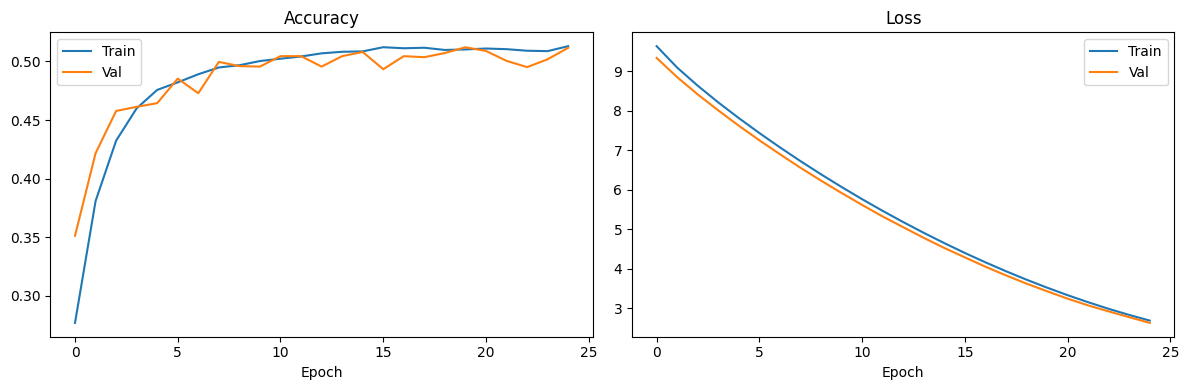

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback, ReduceLROnPlateau
from tensorflow.keras import backend as K
from scikeras.wrappers import KerasClassifier  # Your existing wrapper
import time

# 1) Prepare data (unchanged)
X, y     = load_images(data_dir, img_size)
le       = LabelEncoder()
y_enc    = le.fit_transform(y)
num_cls  = len(le.classes_)

# Splits
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp
)

# 2) Callbacks for tuning
es = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True,
    verbose=1
)
clear_sess = LambdaCallback(on_train_end=lambda logs: K.clear_session())

# 3) Model factory (unchanged)
def create_model(reg_type='l2', reg_param=0.01, learning_rate=0.01, momentum=0.0):
    inp_dim = img_size[0]*img_size[1]*3
    model  = Sequential([
        Input(shape=(inp_dim,)),
        Dense(num_cls, activation='softmax',
              kernel_regularizer=regularizers.L1(reg_param)
                if reg_type=='l1'
                else regularizers.L2(reg_param))
    ])
    opt = SGD(learning_rate=learning_rate, momentum=momentum)
    model.compile(opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# 4) Scikit-learn wrapper, with ALL tunable params declared ahead of time
base_clf = KerasClassifier(
    model=create_model,
    # defaults (will be overridden by RandomizedSearchCV)
    reg_type='l2',
    reg_param=0.01,
    learning_rate=1e-3,
    momentum=0.0,
    epochs=10,
    batch_size=32,
    verbose=1,
    fit__callbacks=[es, clear_sess]
)

# 5) Randomized search over a smaller budget
param_dist = {
    'learning_rate': [1e-3, 1e-4],
    'reg_type':       ['l1', 'l2'],
    'reg_param':      [0.01, 0.1],
    'momentum':       [0.0, 0.5, 0.9],
    'batch_size':     [16, 32, 64]
}

rand_search = RandomizedSearchCV(
    estimator=base_clf,
    param_distributions=param_dist,
    n_iter=10,     # ← only 10 random combos
    cv=2,          # ← 2-fold CV
    scoring='accuracy',
    n_jobs=1,      # ← share the GPU in one process
    verbose=2,
    random_state=42
)

# Callbacks for final training
es_final = EarlyStopping(
    monitor='val_accuracy',  # stop when val-acc stops improving
    mode='max',
    patience=5,              # how many epochs to wait for improvement
    restore_best_weights=True,
    verbose=1
)

rlr = ReduceLROnPlateau(
    monitor='val_loss',      # reduce LR when val_loss stalls
    factor=0.5,
    patience=3,
    verbose=1
)

# 6) Run it and log timings
print("Starting randomized search at", time.strftime("%H:%M:%S"))
start = time.time()
rand_search.fit(X_train, y_train)
print("Search completed at", time.strftime("%H:%M:%S"), 
      f"({(time.time()-start)/60:.1f} min elapsed)")

best = rand_search.best_params_
print("\n>>> Best CV accuracy:", rand_search.best_score_)
print(">>> Best params:", best)

# 7) Re-train final model with more epochs & full logging
final_model = create_model(
    reg_type=best['reg_type'],
    reg_param=best['reg_param'],
    learning_rate=best['learning_rate'],
    momentum=best['momentum']
)

print("\nTraining final model at", time.strftime("%H:%M:%S"))
t0 = time.time()

history = final_model.fit(
    X_train, y_train,
    epochs=100,                      # more epochs now that hyperparams are fixed
    batch_size=best['batch_size'],
    validation_data=(X_val, y_val),
    callbacks=[es_final, rlr, clear_sess],
    verbose=1
)

print(f"Final training took {(time.time()-t0)/60:.1f} minutes\n")


# 8) Evaluate & plot
test_loss, test_acc = final_model.evaluate(X_test, y_test, verbose=1)
print(f"\nFinal test accuracy: {test_acc:.4f}, loss: {test_loss:.4f}")

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],    label='Train')
plt.plot(history.history['val_accuracy'],label='Val')
plt.title('Accuracy'); plt.xlabel('Epoch'); plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],        label='Train')
plt.plot(history.history['val_loss'],    label='Val')
plt.title('Loss'); plt.xlabel('Epoch'); plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier  # Updated wrapper

# Load and preprocess images
X, y = load_images(data_dir, img_size)

# Encode labels to numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

#get # of classes
num_classes = len(label_encoder.classes_)

# Split data: 20% test, 64% train, 16% validation
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp
)

# One-hot encode labels
y_train_cat = to_categorical(y_train, num_classes)
y_val_cat = to_categorical(y_val, num_classes)
y_test_cat = to_categorical(y_test, num_classes)


def create_model(reg_type='l2', reg_param=0.01,learning_rate=0.01, momentum=0.0):
    model = Sequential() #enable model that can add layers
    if reg_type == 'l1':
        regularizer = regularizers.L1(reg_param)
    else:  # l2
        regularizer = regularizers.L2(reg_param)
    #Input shape
    input_shape = img_size[0] * img_size[1] * 3
    #Using SGD as our optimizer for training
    optimizer = SGD(learning_rate=learning_rate, momentum=momentum)

    #dense: fully connected layer
    
    model.add(Input(shape=(input_shape,)))
    #create output layer (6 labels)  using softmax activation
    model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizer))

    #Configures your model for training (how it will learn) stating the optimization algorithm, loss function we want to minize, metrics to store and report performance
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model


#Wrapper object so it can be compatible to use with gridserachcv
# takes in create model function and spits out another function doing the training step with those parameters
model = KerasClassifier(
    model=create_model,
    learning_rate=0.01,
    momentum=0.0,
    epochs=50,  #define epochs of trianing during grid serach

    batch_size=32,
    verbose=0
)
# Define grid search parameters (SGD only)
#Bunch of random combos of parameters are used to trian a model and see which one performs best
param_grid = {
    'learning_rate': [0.001, 0.0001],
    'model__reg_type': ['l1', 'l2'],
    'model__reg_param': [0.01, 0.1],
    'momentum': [0.0, 0.5, 0.9],
    'batch_size': [16, 32, 64]
}

# Set up gridsearch
# Does 3 fold cross validation on every combination of parameters

grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=0
)

# Perform grid search
#trains many models
print("Starting grid search...")
grid_result = grid.fit(X_train, y_train_cat)

# Show best results
print(f"Best score: {grid_result.best_score_}")
print(f"Best parameters: {grid_result.best_params_}")
best_params = grid_result.best_params_

# Creating the best model with the best parameters we have obtained from GridSearch
# our final tuned model
final_model = create_model(
    reg_type=best_params['model__reg_type'],
    reg_param=best_params['model__reg_param'],
    learning_rate=best_params['learning_rate'],
    momentum=best_params['momentum']
)

"""
Trains the final model with its best parameters for X epochs and reports the training and validation loss

"""
history = final_model.fit(
    X_train,
    y_train_cat,
    epochs=100,
    batch_size=best_params['batch_size'],
    validation_data=(X_val, y_val_cat),
    verbose=0
)

# Report the accuracy and loss of the model after evaluating it on the test set
test_loss, test_accuracy = final_model.evaluate(X_test, y_test_cat, verbose=1)
print(f"Final model test accuracy: {test_accuracy:.4f}")
print(f"Final Model Test Loss: {test_loss:.4f}")

#plotting the accuracy and loss graphs
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.savefig('training_history.png')
plt.show()

Loading sea: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2274/2274 [00:01<00:00, 1873.14it/s]


Starting grid search...


2025-05-23 12:42:06.366745: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2025-05-23 12:42:06.367036: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-05-23 12:42:06.367055: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-05-23 12:42:06.367359: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-23 12:42:06.367370: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2025-05-23 12:42:07.883586: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


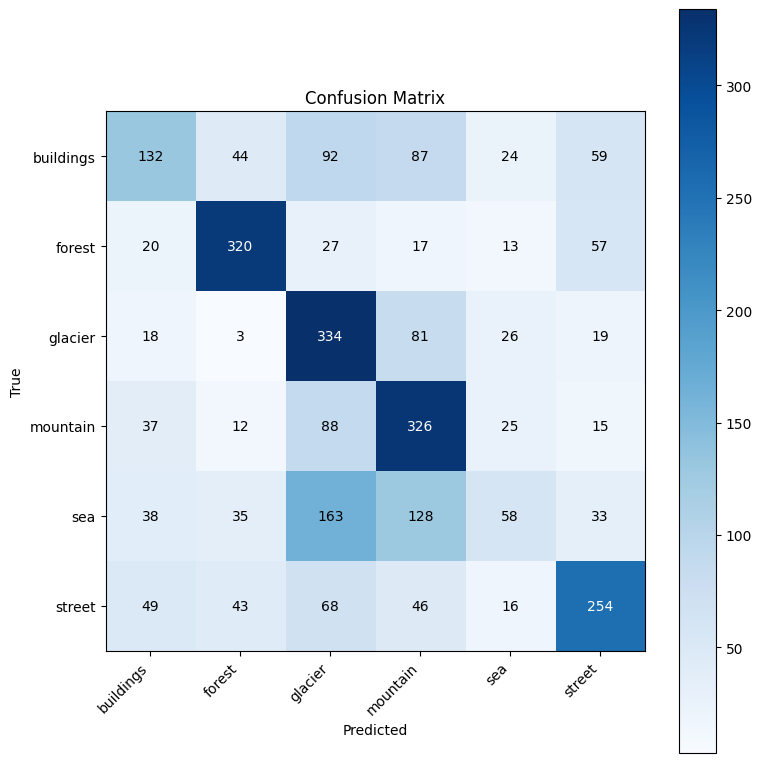


Classification Report:
              precision    recall  f1-score   support

   buildings       0.45      0.30      0.36       438
      forest       0.70      0.70      0.70       454
     glacier       0.43      0.69      0.53       481
    mountain       0.48      0.65      0.55       503
         sea       0.36      0.13      0.19       455
      street       0.58      0.53      0.56       476

    accuracy                           0.51      2807
   macro avg       0.50      0.50      0.48      2807
weighted avg       0.50      0.51      0.48      2807



In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# 1) Predictions
y_pred = np.argmax(final_model.predict(X_test), axis=1)
y_true = y_test

# 2) Confusion matrix
cm = confusion_matrix(y_true, y_pred)
class_names = le.classes_   # <— use the existing LabelEncoder

# 3) Plot with pure Matplotlib
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
fig.colorbar(im, ax=ax)
ax.set(
    xticks=np.arange(len(class_names)),
    yticks=np.arange(len(class_names)),
    xticklabels=class_names,
    yticklabels=class_names,
    xlabel="Predicted",
    ylabel="True",
    title="Confusion Matrix"
)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# 4) Annotate
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(
            j, i, cm[i, j],
            ha="center", va="center",
            color="white" if cm[i, j] > thresh else "black"
        )

plt.tight_layout()
plt.show()

# 5) Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

In [15]:

model_acc = test_acc * 100
print(f"Final model test accuracy: {model_acc:.0f}%")




Final model test accuracy: 51%


In [17]:
# saving the model for testing purposes
final_model.save("train_logreg.h5")